In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import gzip
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Read data

In [3]:
f = gzip.open('/Users/OmersGuest/Downloads/train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 25600

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

In [4]:
f = gzip.open('/Users/OmersGuest/Downloads/train-labels-idx1-ubyte.gz','r')
f.read(8)
labels_list = []
for i in range(0,25600):   
    buf = f.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    labels_list.append(labels[0])

### Choose only images of the number 5

In [5]:
labels_array = np.array(labels_list)

In [6]:
image_five = data[np.where(labels_array == 5)]

### Let's plot few examples 

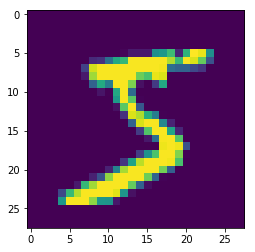

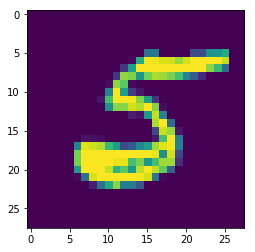

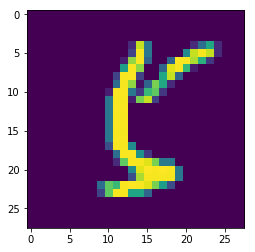

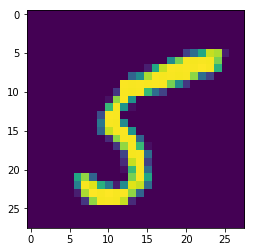

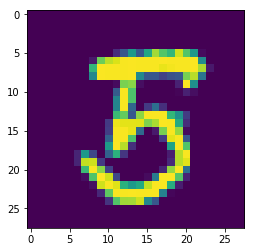

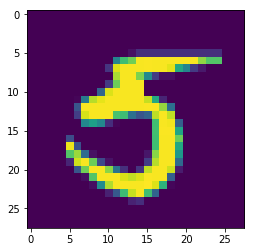

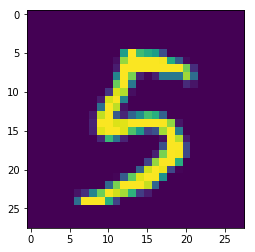

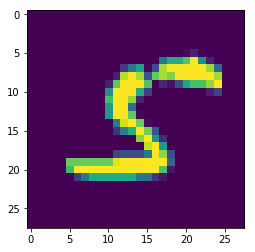

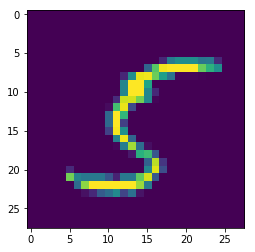

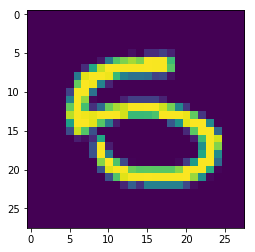

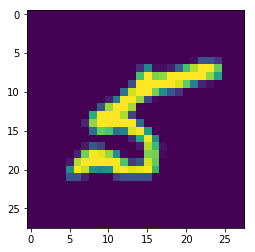

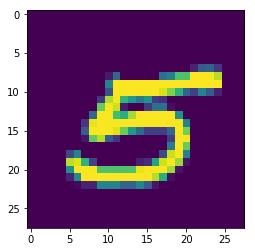

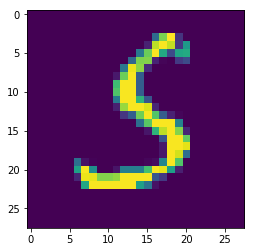

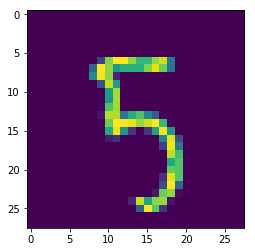

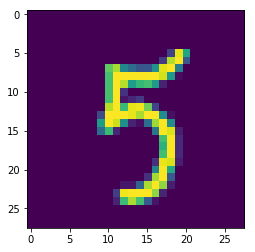

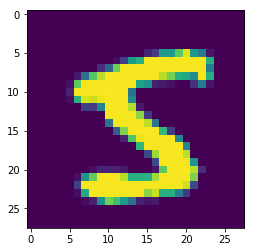

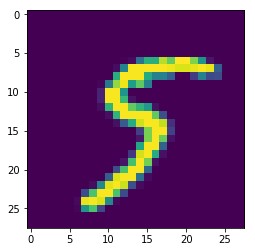

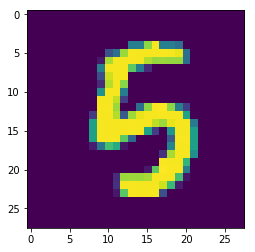

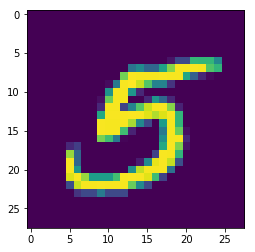

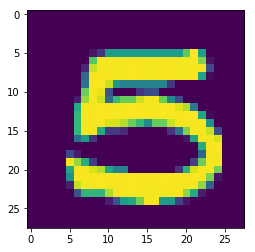

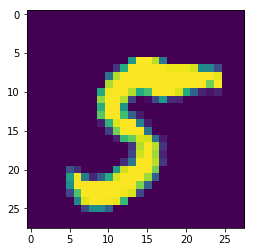

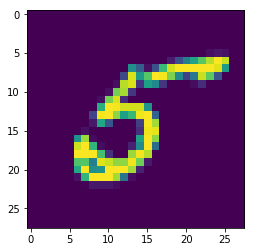

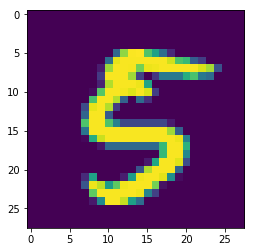

In [82]:
for img_n in range(0, len(image_five), 100):
    
    image = np.asarray(image_five[img_n]).squeeze()
    plt.imshow(image)
    plt.show()

### Choose 900 of these images.

In [174]:
idx = np.random.choice(2287, size = 900)

In [175]:
pca_img = image_five[idx]

In [176]:
pca_img.shape

(900, 28, 28, 1)

let's reshape the training array to be 900 X 784 such that each column is a pixel 
and each row is an image. 

This will be our flattened image. 

In [178]:
flattened_img = pca_img.reshape(900, 784)

### Perform PCA using 

In [168]:
### In PCA we have to scale the units otherwise we might consider one dimension
### to vary more than another based on units' falesy (1 meter vs. 100 cm)


 - Use the standard scaler

In [113]:
scaler = StandardScaler()

In [115]:
flattened_img = scaler.fit_transform(flattened_img)

### Run PCA with 30 components

In [116]:
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(flattened_img)

In [117]:
principalComponents.shape

(900, 30)

### Run the inverse to get an approximation to the original images 

In [118]:
original_approx = pca.inverse_transform(principalComponents)

### Reshape the images back to 28 X 28 pixels.

In [119]:
original_approx = original_approx.reshape(900, 28, 28)

### Plot few examples of the original images next to their approximation

1
3


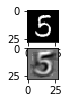

2
4


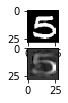

3
5


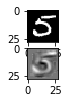

4
6


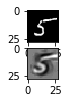

5
7


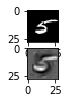

6
8


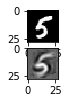

7
9


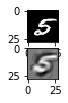

8
10


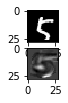

9
11


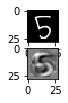

In [167]:
import matplotlib.pyplot as plt

for i, img_n in enumerate(range(1, len(pca_img), 100)):
    image = np.asarray(pca_img[img_n]).squeeze()
    plt.subplot(6, 2, i + 1)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.subplot(6, 2, i + 3)
    image_aprox = np.asarray(original_approx[img_n]).squeeze()
    plt.imshow(image_aprox, cmap = plt.cm.gray)
    plt.show()

In [179]:
### Cool so we might consider replacing 784 by 30 --> that's quite a comression!

In [ ]:
[super stretch] 5. How to decide on the number of components (K) to take in PCA?
One way would be to plot the ordered and scaled eigenvalues and eyeball the 'knee' in the data.
Another way would be to use different values of K and then use KNN on validation data.
Try to do one of these methods! 